# Рекомендация тарифов

**Описание:**

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится.

**Цель:**

* Построить модель с максимально большим значением *accuracy*. 
* Довести долю правильных ответов по крайней мере до 0.75 
* Проверить *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import warnings
from scipy import stats


from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

warnings.simplefilter(action='ignore', category=FutureWarning)
from joblib import dump

In [2]:
plt.style.use("ggplot")
rcParams['figure.figsize'] = (6,  3)

In [3]:
try:
    data = pd.read_csv('/datasets/users_behavior.csv', sep = ',')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

In [4]:
data.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


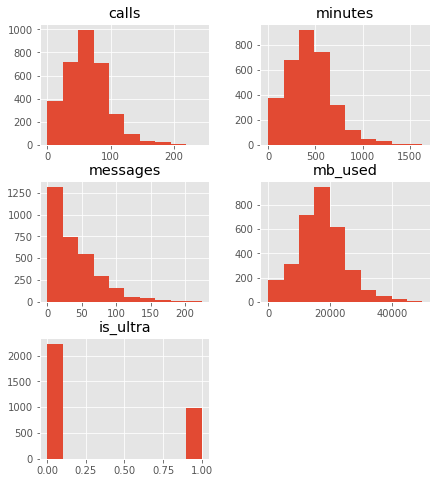

In [6]:
data.hist(figsize=(7, 8))
plt.show()

## Разбейте данные на выборки

### Разделение исходных данных на обучающую, валидационную и тестовую выборки

Данные были разделены на обучающую, валидационную и тестовую выборки


Они были разделены в соотношении:
* 70% обучающая выборка
* 15% валидационная выборка
* 15% тестовая выборка

In [7]:
features_train, features_test, target_train, target_test = train_test_split(data.drop("is_ultra", axis=1), 
                                                                      data["is_ultra"], 
                                                                      test_size=0.15, 
                                                                      random_state=1407)

In [8]:
features_train, features_valid, target_train, target_valid = train_test_split(features_train, 
                                                                  target_train, 
                                                                  test_size=0.15, 
                                                                  random_state=1407)


## Исследуйте модели

### Случайный лес

Алгоритм обучает большое количество независимых друг от друга деревьев, а потом принимает решение на основе голосования. Случайный лес помогает улучшить результат предсказания и избежать переобучения

In [9]:
best_model = None
best_result = 0
for est in range(1, 50):
    model = RandomForestClassifier(random_state=1407, n_estimators=est) 
    model.fit(features_train, target_train) 
    result = model.score(features_valid, target_valid) 
    if result > best_result:
        best_model = model 
        best_result = result 
        
        
print("Accuracy наилучшей модели на валидационной выборке:", best_result)
print('Лучшая модель:', best_model)

Accuracy наилучшей модели на валидационной выборке: 0.802439024390244
Лучшая модель: RandomForestClassifier(n_estimators=8, random_state=1407)


### Логистическая регрессия

In [10]:
model_lr = LogisticRegression(random_state=1407, solver='lbfgs', max_iter=1000)
model_lr.fit(features_train, target_train) 

prediction = model_lr.predict(features_valid) 
result_valid_LogisticRegression = model_lr.score(features_valid, target_valid)

dump(model_lr, 'model_9_1.joblib')

print("Accuracy наилучшей модели на валидационной выборке:", result_valid_LogisticRegression)

Accuracy наилучшей модели на валидационной выборке: 0.7292682926829268


### Решающее дерево

In [11]:
best_model_2 = None
best_result_2 = 0
for depth in range(1, 50):
	model_2 = DecisionTreeClassifier(random_state=1407, max_depth=depth) 
	model_2.fit(features_train, target_train) 
	predictions_2 = model_2.predict(features_valid) 
	result_2 = accuracy_score(target_valid, predictions_2) 
	if result_2 > best_result_2:
		best_model_2 = model_2
		best_result_2 = result_2
        
print("Accuracy лучшей модели:", best_result_2)
print('Лучшая модель:', best_model_2)

Accuracy лучшей модели: 0.8048780487804879
Лучшая модель: DecisionTreeClassifier(max_depth=10, random_state=1407)


## Проверьте модель на тестовой выборке

In [12]:
#Случайный лес
result_test_randomforest = best_model.score(features_test, target_test) 
print("Accuracy наилучшей модели случайного леса на тестовой выборке:", result_test_randomforest)

#Логистическая регрессия
result_test_LogisticRegression = model_lr.score(features_test, target_test) 
print("Accuracy наилучшей модели логистической регрессии на тестовой выборке:", result_test_LogisticRegression)

#Решающее дерево
result_test_DecisionTreeClassifier = model_2.score(features_test, target_test) 
print("Accuracy наилучшей модели решающего дерева на тестовой выборке:", result_test_DecisionTreeClassifier)



Accuracy наилучшей модели случайного леса на тестовой выборке: 0.782608695652174
Accuracy наилучшей модели логистической регрессии на тестовой выборке: 0.7060041407867494
Accuracy наилучшей модели решающего дерева на тестовой выборке: 0.6894409937888198


##  Проверьте модели на адекватность

* Precision: Доля истинно положительных прогнозов по отношению ко всем положительным прогнозам.
* Recall (Sensitivity или True Positive Rate): Доля истинно положительных предсказаний ко всем истинно положительным экземплярам.
* F1-score: Среднее гармоническое значение показателей precision и recall. Он придает равный вес Precision и Recall и особенно полезен при несбалансированном распределении классов.


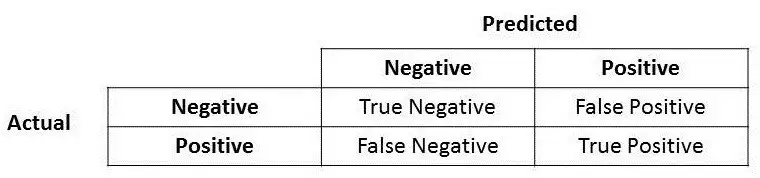

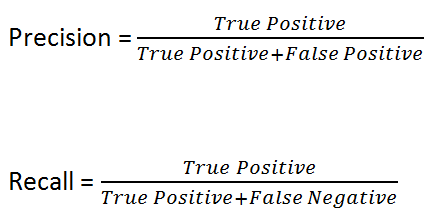

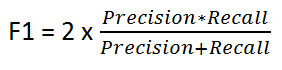

In [13]:
#Случайный лес
y_pred = best_model.predict(features_test)
precision = precision_score(target_test, y_pred)
recall = recall_score(target_test, y_pred)
f1 = f1_score(target_test, y_pred)

In [14]:
print('Для модели случайный лес: ', 'precision', precision, 'recall', recall, 'f1', f1)

Для модели случайный лес:  precision 0.7211538461538461 recall 0.4966887417218543 f1 0.588235294117647


In [15]:
#Логистическая регрессия
y_pred = model_lr.predict(features_test)
precision = precision_score(target_test, y_pred)
recall = recall_score(target_test, y_pred)
f1 = f1_score(target_test, y_pred)

print('Для модели логистической регрессии: ', 'precision', precision, 'recall', recall, 'f1', f1)

Для модели логистической регрессии:  precision 0.7647058823529411 recall 0.08609271523178808 f1 0.15476190476190477


In [16]:
#Решающее дерево
y_pred = model_2.predict(features_test)
precision = precision_score(target_test, y_pred)
recall = recall_score(target_test, y_pred)
f1 = f1_score(target_test, y_pred)

print('Для модели решающего дерева: ', 'precision', precision, 'recall', recall, 'f1', f1)

Для модели решающего дерева:  precision 0.5032679738562091 recall 0.5099337748344371 f1 0.506578947368421


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75


## Вывод

* Была построена модель с максимально большим значением accuracy
* Доля правильных ответов доведена до 0.75
* Проверена accuracy на тестовой выборке

Был получен интересный результат.
При проверке на тестовой выборке лучше всего себя показала модель: 
* ***случайного леса*** со значением **0.78**, 
* на втором месте модель логистической регрессии **0.71**, 
* а на последнем решающего дерева **0.69**

При проверке метрик Precision, Recall (Sensitivity или True Positive Rate) и F1-score, по значению Precision лучше всего себя проявила модель ***логистической регрессии***, однако в остальных метриках показала низкие значения

Recall должен быть метрикой модели, которую мы используем для выбора нашей лучшей модели, когда есть высокая стоимость, связанная с ложным отрицанием. То есть для нас большую цену будет играть отрицание моделью того, что на самом деле истинно, например, при определении больного онкологией, по данной метрике лидирует ***решающее дерево***

Оценка F1 может быть лучшим показателем, если нам нужно найти баланс между Precision и Recall, по этой метрике лучше всего себя показала модель ***случайного леса*** 
